# **1. Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

2025-05-31 21:49:07.811963: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748728148.076421      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748728148.153486      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df = pd.read_csv('/kaggle/input/cic-iot-dataset2023-mcyber/Merged63.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428161 entries, 0 to 428160
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Header_Length    428161 non-null  float64
 1   Protocol Type    428161 non-null  int64  
 2   Time_To_Live     428161 non-null  float64
 3   Rate             428161 non-null  float64
 4   fin_flag_number  428161 non-null  float64
 5   syn_flag_number  428161 non-null  float64
 6   rst_flag_number  428161 non-null  float64
 7   psh_flag_number  428161 non-null  float64
 8   ack_flag_number  428161 non-null  float64
 9   ece_flag_number  428161 non-null  float64
 10  cwr_flag_number  428161 non-null  float64
 11  ack_count        428161 non-null  int64  
 12  syn_count        428161 non-null  int64  
 13  fin_count        428161 non-null  int64  
 14  rst_count        428161 non-null  int64  
 15  HTTP             428161 non-null  float64
 16  HTTPS            428161 non-null  floa

In [4]:
df.head()

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Label
0,7.76,17,69.73,49096.383004,0.0,0.0,0.0,0.0,0.0,0.0,...,6030,60,70,60.3,1.714466,60.3,0.000021,100,2.939394,DOS-UDP_FLOOD
1,7.92,17,63.36,17895.315300,0.0,0.0,0.0,0.0,0.0,0.0,...,6000,60,60,60.0,0.000000,60.0,0.000056,100,0.000000,DDOS-UDP_FLOOD
2,0.00,1,64.00,41169.061641,0.0,0.0,0.0,0.0,0.0,0.0,...,6000,60,60,60.0,0.000000,60.0,0.000024,100,0.000000,DDOS-ICMP_FLOOD
3,20.00,6,64.00,16675.163996,0.0,0.0,0.0,1.0,1.0,0.0,...,6000,60,60,60.0,0.000000,60.0,0.000060,100,0.000000,DDOS-PSHACK_FLOOD
4,20.00,6,64.00,29516.565799,0.0,0.0,0.0,0.0,0.0,0.0,...,6000,60,60,60.0,0.000000,60.0,0.000034,100,0.000000,DOS-TCP_FLOOD


# **2. Data Pre-processing**

In [5]:
encoders = {}

for col in df.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428161 entries, 0 to 428160
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Header_Length    428161 non-null  float64
 1   Protocol Type    428161 non-null  int64  
 2   Time_To_Live     428161 non-null  float64
 3   Rate             428161 non-null  float64
 4   fin_flag_number  428161 non-null  float64
 5   syn_flag_number  428161 non-null  float64
 6   rst_flag_number  428161 non-null  float64
 7   psh_flag_number  428161 non-null  float64
 8   ack_flag_number  428161 non-null  float64
 9   ece_flag_number  428161 non-null  float64
 10  cwr_flag_number  428161 non-null  float64
 11  ack_count        428161 non-null  int64  
 12  syn_count        428161 non-null  int64  
 13  fin_count        428161 non-null  int64  
 14  rst_count        428161 non-null  int64  
 15  HTTP             428161 non-null  float64
 16  HTTPS            428161 non-null  floa

In [6]:
df = df.astype({col: 'float64' for col in df.select_dtypes(include='int64').columns})

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428161 entries, 0 to 428160
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Header_Length    428161 non-null  float64
 1   Protocol Type    428161 non-null  float64
 2   Time_To_Live     428161 non-null  float64
 3   Rate             428161 non-null  float64
 4   fin_flag_number  428161 non-null  float64
 5   syn_flag_number  428161 non-null  float64
 6   rst_flag_number  428161 non-null  float64
 7   psh_flag_number  428161 non-null  float64
 8   ack_flag_number  428161 non-null  float64
 9   ece_flag_number  428161 non-null  float64
 10  cwr_flag_number  428161 non-null  float64
 11  ack_count        428161 non-null  float64
 12  syn_count        428161 non-null  float64
 13  fin_count        428161 non-null  float64
 14  rst_count        428161 non-null  float64
 15  HTTP             428161 non-null  float64
 16  HTTPS            428161 non-null  floa

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Label
0,7.76,17.0,69.73,49096.383004,0.0,0.0,0.0,0.0,0.0,0.0,...,6030.0,60.0,70.0,60.3,1.714466,60.3,0.000021,100.0,2.939394,21.0
1,7.92,17.0,63.36,17895.315300,0.0,0.0,0.0,0.0,0.0,0.0,...,6000.0,60.0,60.0,60.0,0.000000,60.0,0.000056,100.0,0.000000,14.0
2,0.00,1.0,64.00,41169.061641,0.0,0.0,0.0,0.0,0.0,0.0,...,6000.0,60.0,60.0,60.0,0.000000,60.0,0.000024,100.0,0.000000,6.0
3,20.00,6.0,64.00,16675.163996,0.0,0.0,0.0,1.0,1.0,0.0,...,6000.0,60.0,60.0,60.0,0.000000,60.0,0.000060,100.0,0.000000,8.0
4,20.00,6.0,64.00,29516.565799,0.0,0.0,0.0,0.0,0.0,0.0,...,6000.0,60.0,60.0,60.0,0.000000,60.0,0.000034,100.0,0.000000,20.0


In [7]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428161 entries, 0 to 428160
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Header_Length    428161 non-null  float64
 1   Protocol Type    428161 non-null  float64
 2   Time_To_Live     428161 non-null  float64
 3   Rate             428161 non-null  float64
 4   fin_flag_number  428161 non-null  float64
 5   syn_flag_number  428161 non-null  float64
 6   rst_flag_number  428161 non-null  float64
 7   psh_flag_number  428161 non-null  float64
 8   ack_flag_number  428161 non-null  float64
 9   ece_flag_number  428161 non-null  float64
 10  cwr_flag_number  428161 non-null  float64
 11  ack_count        428161 non-null  float64
 12  syn_count        428161 non-null  float64
 13  fin_count        428161 non-null  float64
 14  rst_count        428161 non-null  float64
 15  HTTP             428161 non-null  float64
 16  HTTPS            428161 non-null  floa

outliers

In [8]:
z_scores = np.abs(zscore(df.select_dtypes(include='number')))

outliers = (z_scores > 3)

outliers_sum = outliers.sum(axis=0)
print("Outliers por coluna:")
print(pd.Series(outliers_sum, index=df.select_dtypes(include='number').columns))

Outliers por coluna:
Header_Length        642
Protocol Type      15858
Time_To_Live        8272
Rate                5472
fin_flag_number    36583
syn_flag_number        0
rst_flag_number    36826
psh_flag_number    34208
ack_flag_number        0
ece_flag_number      334
cwr_flag_number      141
ack_count          34425
syn_count              0
fin_count          36553
rst_count          36754
HTTP               20546
HTTPS              21025
DNS                 4530
Telnet               365
SMTP                 361
SSH                  485
IRC                  423
TCP                    0
UDP                    0
DHCP                 723
ARP                 5061
ICMP                   0
IGMP                 278
IPv                 5061
LLC                 5061
Tot sum             9573
Min                12071
Max                 6304
AVG                13504
Std                10176
Tot size           13504
IAT                    2
Number             21402
Variance            2031
Labe

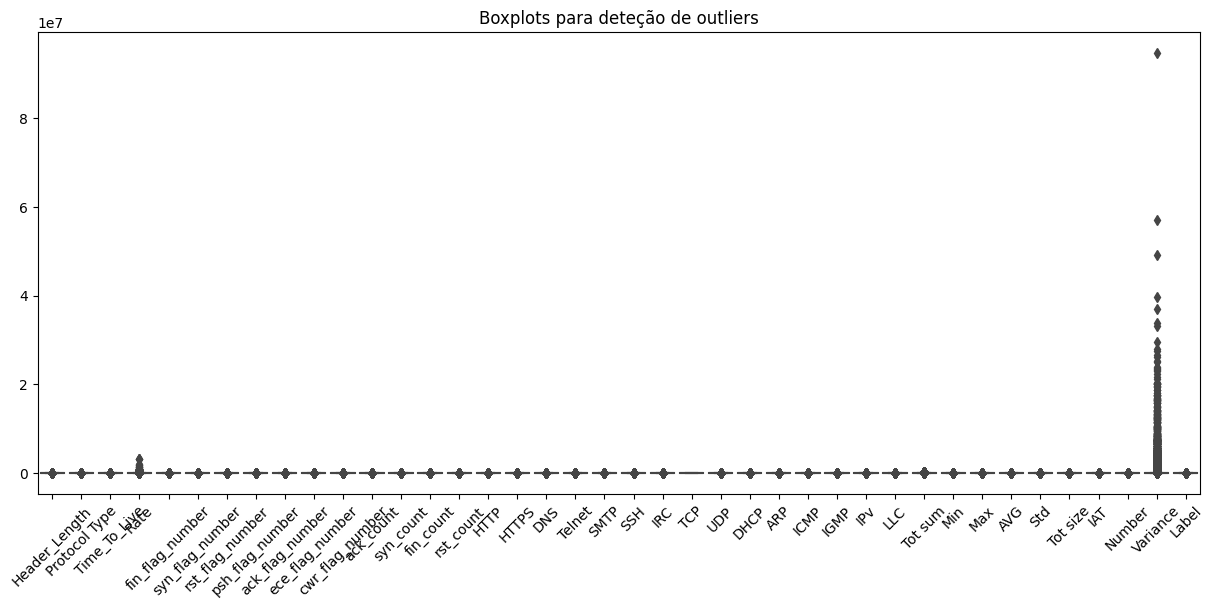

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.title("Boxplots para deteção de outliers")
plt.show()

In [10]:
X_isolation = df.select_dtypes(include='number')

iso = IsolationForest(contamination=0.05, random_state=42)
outlier_pred = iso.fit_predict(X_isolation)

df['Outlier'] = (outlier_pred == -1).astype(int)

print("Total de outliers encontrados:", df['Outlier'].sum())

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Total de outliers encontrados: 21407


In [11]:
df[df['Outlier'] == 1]

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Label,Outlier
8,8.20,17.0,82.35,239.134889,0.02,0.00,0.0,0.06,0.18,0.0,...,60.0,1514.0,618.21,602.356623,618.21,0.004203,100.0,3.628335e+05,15.0,1
38,28.00,6.0,66.40,74.696472,0.20,0.10,0.0,0.30,0.70,0.0,...,66.0,441.0,137.30,125.070691,137.30,0.013450,10.0,1.564268e+04,32.0,1
49,24.36,6.0,89.87,952.108379,0.01,0.02,0.0,0.02,0.37,0.0,...,60.0,4410.0,474.10,966.579144,474.10,0.001050,100.0,9.342752e+05,20.0,1
74,22.40,6.0,107.00,156.100814,0.10,0.00,0.0,0.40,0.60,0.0,...,66.0,573.0,168.20,148.366513,168.20,0.006623,10.0,2.201262e+04,32.0,1
96,32.00,6.0,169.90,145.068378,0.10,0.00,0.0,0.40,1.00,0.0,...,66.0,2962.0,379.70,908.212536,379.70,0.006893,10.0,8.248500e+05,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428068,27.20,6.0,70.90,95.544844,0.00,0.10,0.0,0.40,0.90,0.0,...,60.0,357.0,109.70,91.434312,109.70,0.017998,10.0,8.360233e+03,32.0,1
428087,32.00,6.0,165.20,286.664571,0.00,0.00,0.0,0.10,1.00,0.0,...,66.0,2962.0,794.70,1020.299526,794.70,0.006505,10.0,1.041011e+06,1.0,1
428091,23.20,6.0,59.10,36.526872,0.20,0.10,0.0,0.10,0.60,0.0,...,60.0,90.0,68.10,9.146341,68.10,0.027446,10.0,8.365556e+01,1.0,1
428134,32.00,6.0,180.90,1165.505321,0.00,0.00,0.0,0.00,1.00,0.0,...,66.0,1514.0,500.40,699.450451,500.40,0.000906,10.0,4.892309e+05,1.0,1


In [12]:
df = df[df['Outlier'] == 0].drop(columns='Outlier')

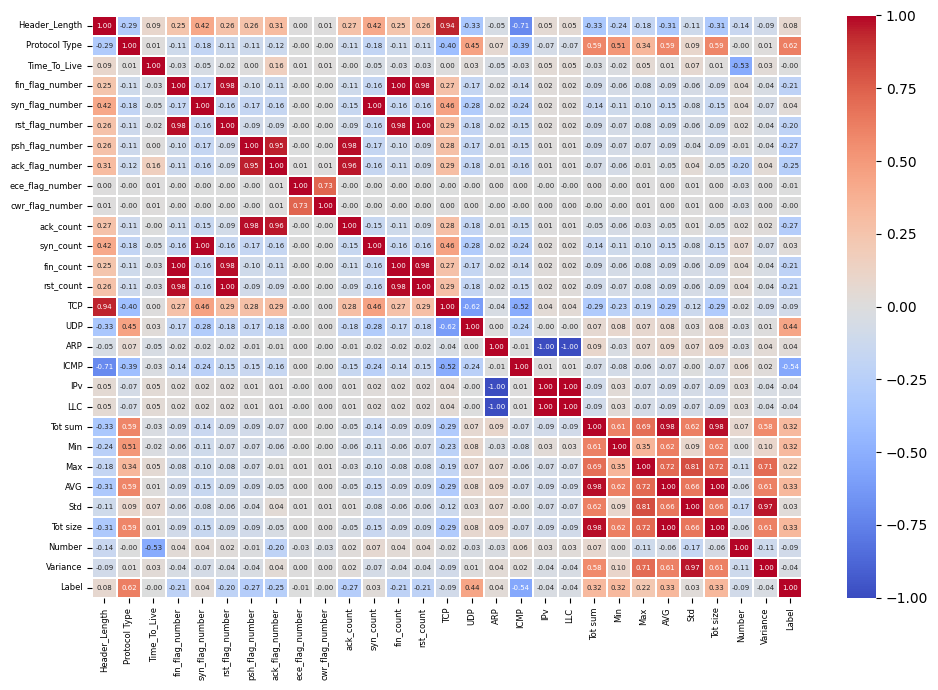

In [13]:
corr_matrix = df.corr().abs() 

np.fill_diagonal(corr_matrix.values, 0)

max_corr = corr_matrix.max()

limiar = 0.5
colunas_interessantes = max_corr[max_corr > limiar].index.tolist()

df_filtrado = df[colunas_interessantes]

correlation_matrix = df_filtrado.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    linewidths=0.3, 
    annot_kws={"size": 5}, 
    cbar=True
)
plt.yticks(rotation=0, ha='right', fontsize=6)
plt.xticks(rotation=90, ha='center', fontsize=6) 
plt.tight_layout()
plt.savefig("matriz_correlacao_filtrada.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()

# **3. Machine Learning Models Training**

In [14]:
X = df.drop(columns=['Label'])
y = df['Label']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **4.1 Clustering**

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

#df_clustering = df.copy()

#X_clutering = df_clustering.drop('Label', axis=1)

#scaler = MinMaxScaler()
#X_clutering_scaled = scaler.fit_transform(X_clutering)

#k = 5
#kmeans = KMeans(n_clusters=k, random_state=42)
#clusters = kmeans.fit_predict(X_clutering_scaled)

#df_clustering['Cluster'] = clusters

#score = silhouette_score(X_clutering_scaled, clusters)
#print(f"Silhouette Score para k={k}: {score:.4f}")

In [17]:
#inertia = []
#K_range = range(1, 11)

#for k in K_range:
    #km = KMeans(n_clusters=k, random_state=42)
    #km.fit(X_clutering_scaled)
    #inertia.append(km.inertia_)

#plt.figure(figsize=(8, 4))
#plt.plot(K_range, inertia, 'bo-')
#plt.xlabel('Número de Clusters (k)')
#plt.ylabel('Inércia')
#plt.title('Método do Cotovelo')
#plt.show()

## **4.2 Classification Models**

### **4.2.1 Random Forest**

In [18]:
rf_model_cla = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_cla.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### **4.2.2 Decision Tree**

In [19]:
dt_model_cla = DecisionTreeClassifier(max_depth=200, min_samples_split=5,random_state=42)
dt_model_cla.fit(X_train, y_train)

# tree_text = export_text(dt_model_cla, feature_names=X_train.columns.tolist())

# with open("arvore_decisao.txt", "w", encoding="utf-8") as f:
#     f.write(tree_text)

DecisionTreeClassifier(max_depth=200, min_samples_split=5, random_state=42)

### **4.2.3 KNN**

In [20]:
knn_model_cla = KNeighborsClassifier(n_neighbors=5)
knn_model_cla.fit(X_train, y_train)

KNeighborsClassifier()

### **4.2.3 Logistic Regression**

In [21]:
lr_model_cla = LogisticRegression(max_iter=100)
lr_model_cla.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 4.2.4 SVM

In [22]:
svm_model_cla = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model_cla.fit(X_train, y_train)

SVC(random_state=42)

### 4.2.5 Gradient Boost

In [23]:
gb_model_cla = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model_cla.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

### 4.2.6 AdaBoost

In [24]:
ada_model_cla = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
ada_model_cla.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

### 4.2.7 XGBoost

In [25]:
xgb_model_cla = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

xgb_model_cla.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

### 4.2.8 CatBoost

In [26]:
catboost_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    verbose=0,
    random_seed=42
)

catboost_model.fit(X_train, y_train)

### 4.2.9 LightGBM

In [27]:
lgbm_model_cla = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=10,
    random_state=42
)

lgbm_model_cla.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3903
[LightGBM] [Info] Number of data points in the train set: 325403, number of used features: 39
[LightGBM] [Info] Start training from score -10.746910
[LightGBM] [Info] Start training from score -5.107539
[LightGBM] [Info] Start training from score -9.601777
[LightGBM] [Info] Start training from score -10.294924
[LightGBM] [Info] Start training from score -5.440766
[LightGBM] [Info] Start training from score -9.434723
[LightGBM] [Info] Start training from score -1.825357
[LightGBM] [Info] Start training from score -5.634922
[LightGBM] [Info] Start training from score -2.382335
[LightGBM] [Info] Start training from score -2.419874
[LightGBM] [Info] Start training from score -8.908630
[LightGBM] [Info] Start training from score -2.527

LGBMClassifier(max_depth=10, random_state=42)

# **5. Comparison Between Machine Learning Models**

### **5.1. Classification Models**

In [28]:
def calculate_classification_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='weighted', zero_division=0),
        recall_score(y_test, y_pred, average='weighted', zero_division=0),
        f1_score(y_test, y_pred, average='weighted', zero_division=0)
    ]

In [29]:
knn_cla = calculate_classification_metrics(knn_model_cla, X_test, y_test)
dt_cla = calculate_classification_metrics(dt_model_cla, X_test, y_test)
rf_cla = calculate_classification_metrics(rf_model_cla, X_test, y_test)
lr_cla = calculate_classification_metrics(lr_model_cla, X_test, y_test)
svm_cla = calculate_classification_metrics(svm_model_cla, X_test, y_test)
gb_cla = calculate_classification_metrics(gb_model_cla, X_test, y_test)
ada_cla = calculate_classification_metrics(ada_model_cla, X_test, y_test)
xgb_cla = calculate_classification_metrics(xgb_model_cla, X_test, y_test)
catboost_cla = calculate_classification_metrics(catboost_model, X_test, y_test)
lgbm_cla = calculate_classification_metrics(lgbm_model_cla, X_test, y_test)

metrics_df_class = pd.DataFrame({
    'K-Nearest Neighbors': knn_cla[:4],
    'Decision Tree': dt_cla[:4],
    'Random Forest': rf_cla[:4],
    'Logistic Regression': lr_cla[:4],
    'SVM': svm_cla[:4],
    'GradientBoost': gb_cla[:4],
    'AdaBoost':ada_cla[:4],
    'XGBoost': xgb_cla[:4],
    'CatBoost': catboost_cla[:4],
    'LightGBM': lgbm_cla[:4]
}, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

metrics_df_class = metrics_df_class.T
metrics_df_class = metrics_df_class.apply(lambda x: x.round(4).map("{:.4f}".format))

print("Classification Metrics Comparison Table:")
styled_metrics_table_class = metrics_df_class.style.set_table_styles([
    {'selector': 'thead th', 'props': [('font-size', '15pt')]},
    {'selector': 'tbody td', 'props': [('font-size', '15pt')]},
])
display(styled_metrics_table_class)

Classification Metrics Comparison Table:


,Accuracy,Precision,Recall,F1 Score
K-Nearest Neighbors,0.7589,0.7560,0.7589,0.7542
Decision Tree,0.7507,0.7468,0.7507,0.7470
Random Forest,0.7742,0.7740,0.7742,0.7640
Logistic Regression,0.7689,0.7785,0.7689,0.7431
SVM,0.7704,0.7853,0.7704,0.7430
GradientBoost,0.0032,0.0224,0.0032,0.0048
AdaBoost,0.4832,0.3777,0.4832,0.3958
XGBoost,0.7824,0.7875,0.7824,0.7694
CatBoost,0.7759,0.7856,0.7759,0.7542
LightGBM,0.3575,0.3546,0.3575,0.3116


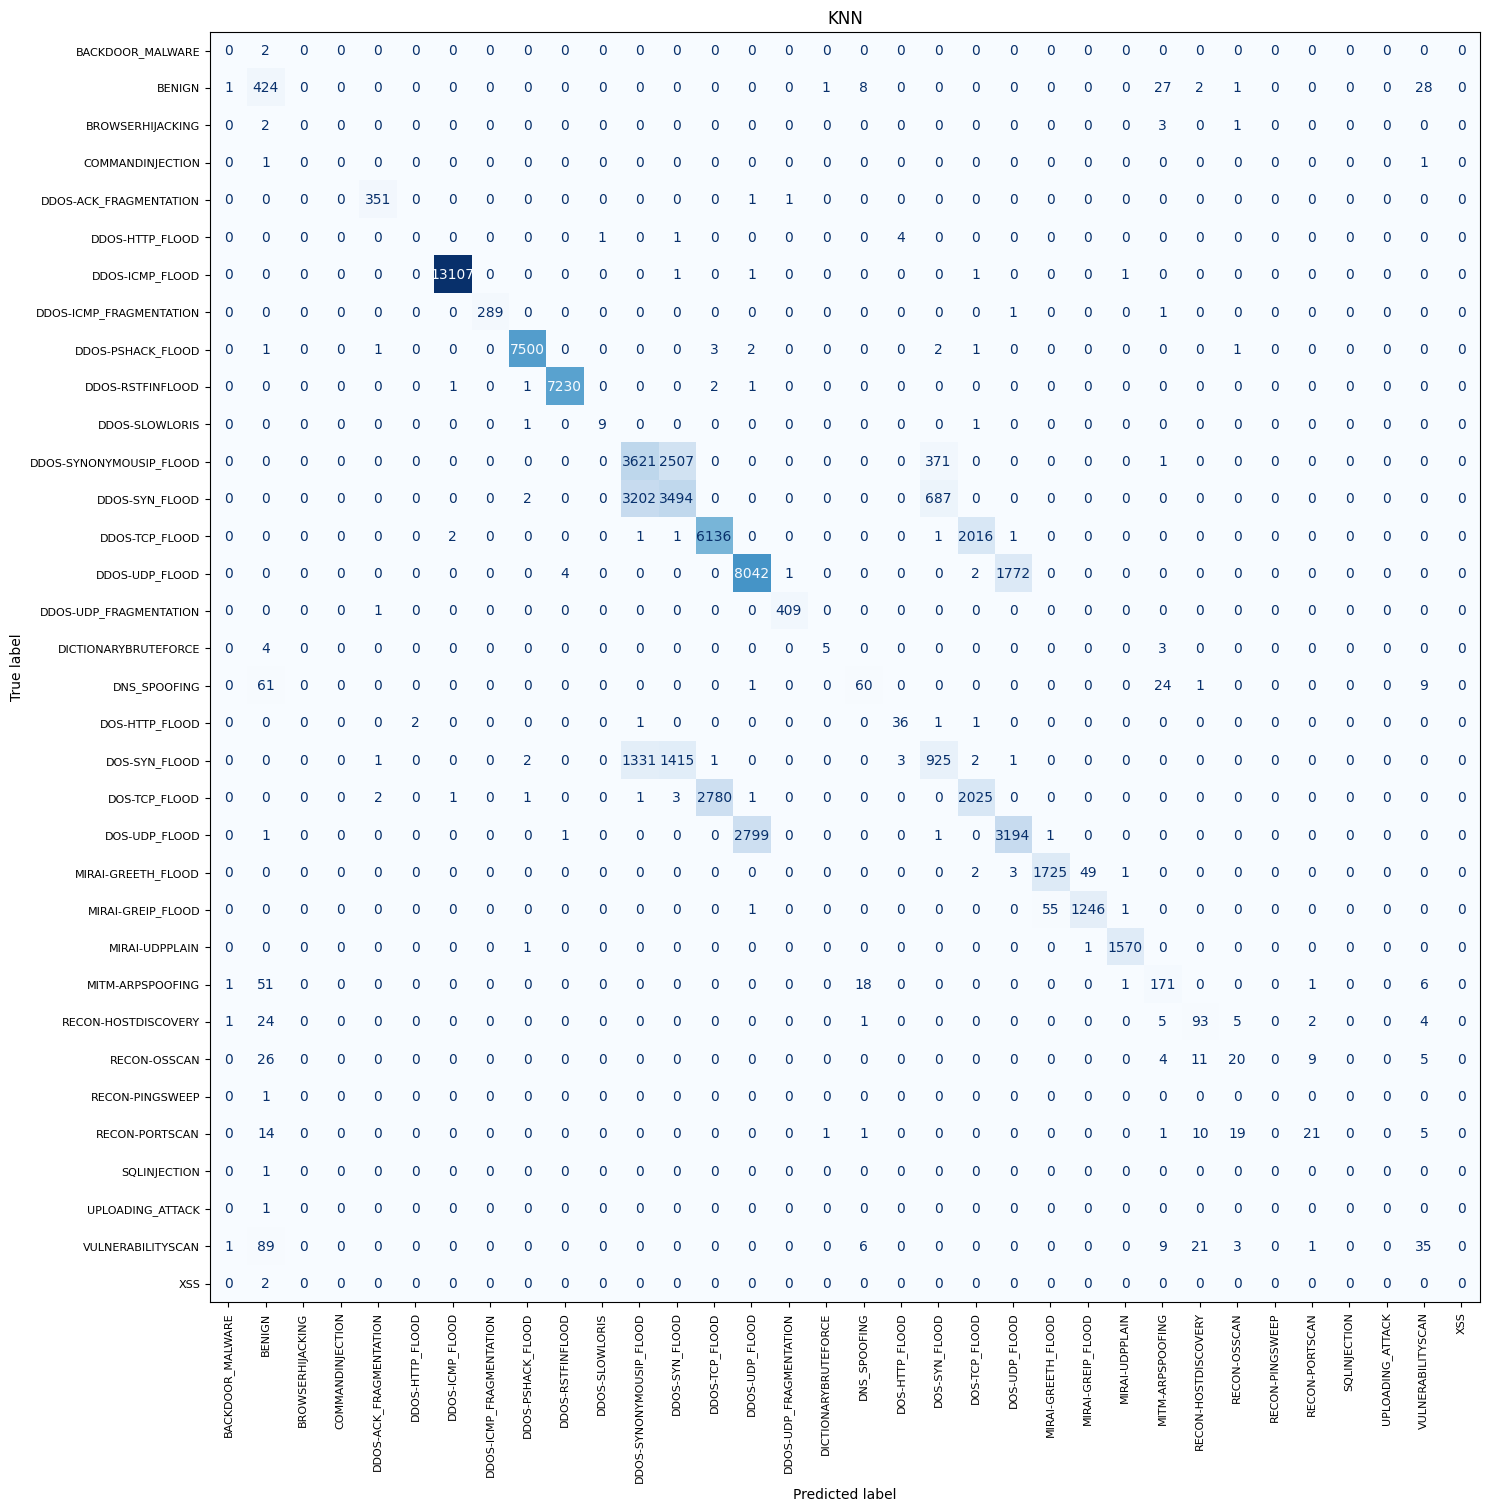

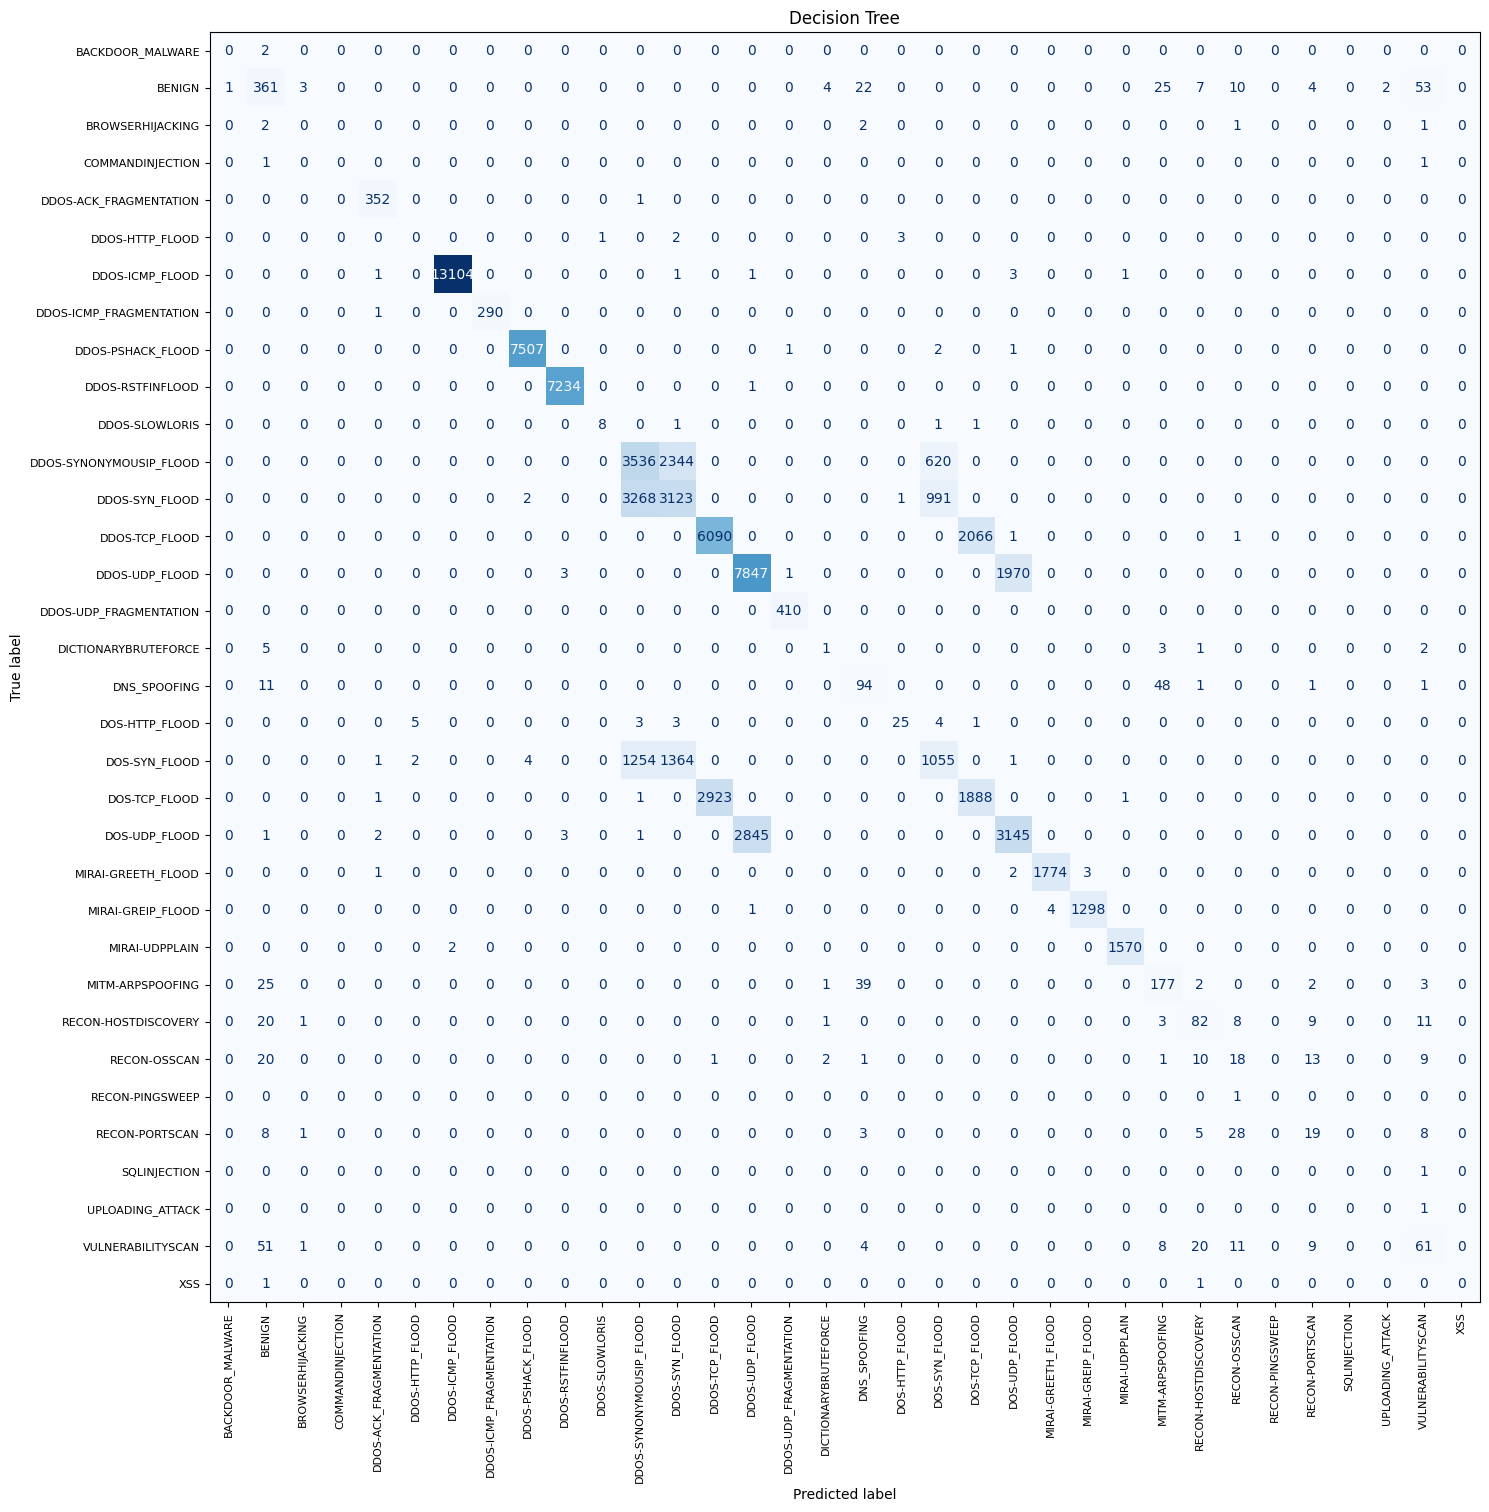

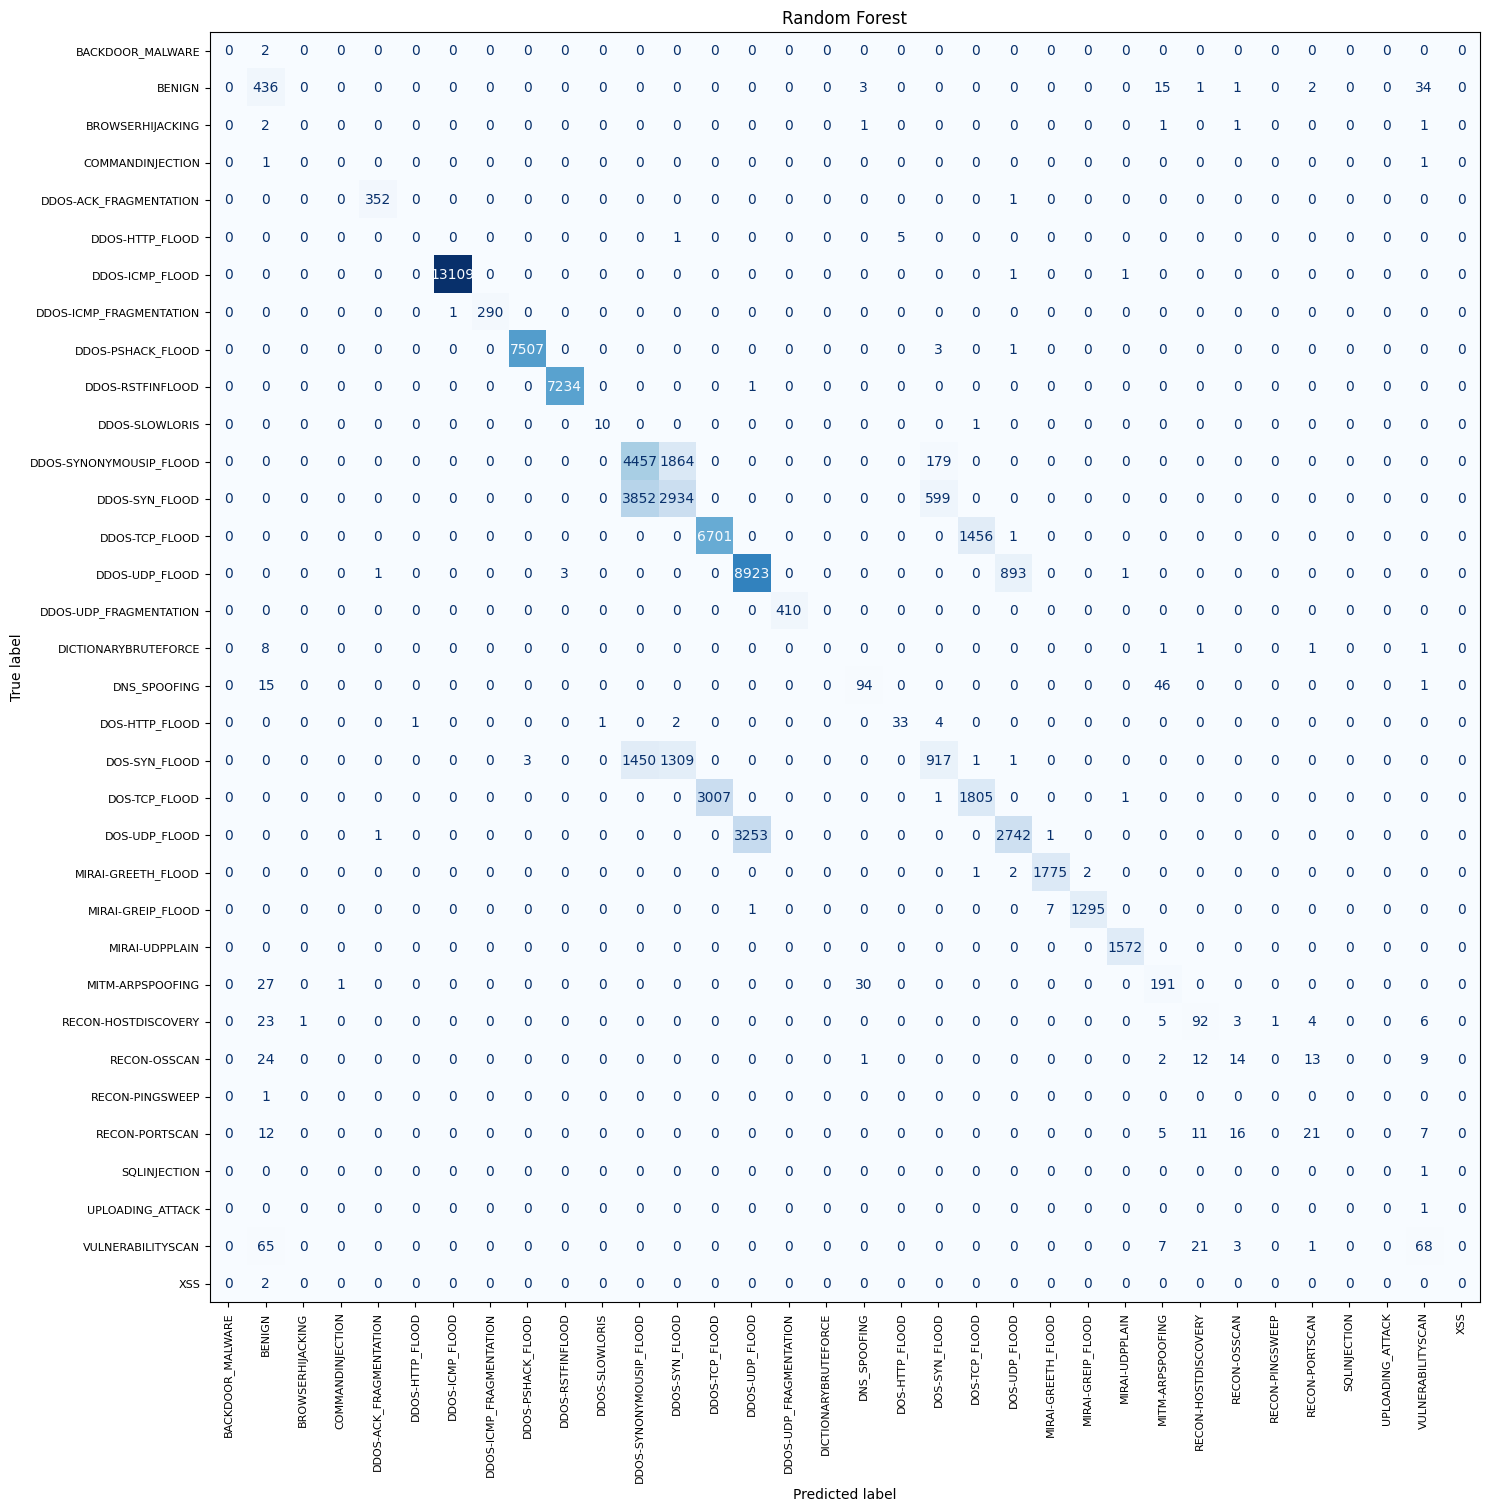

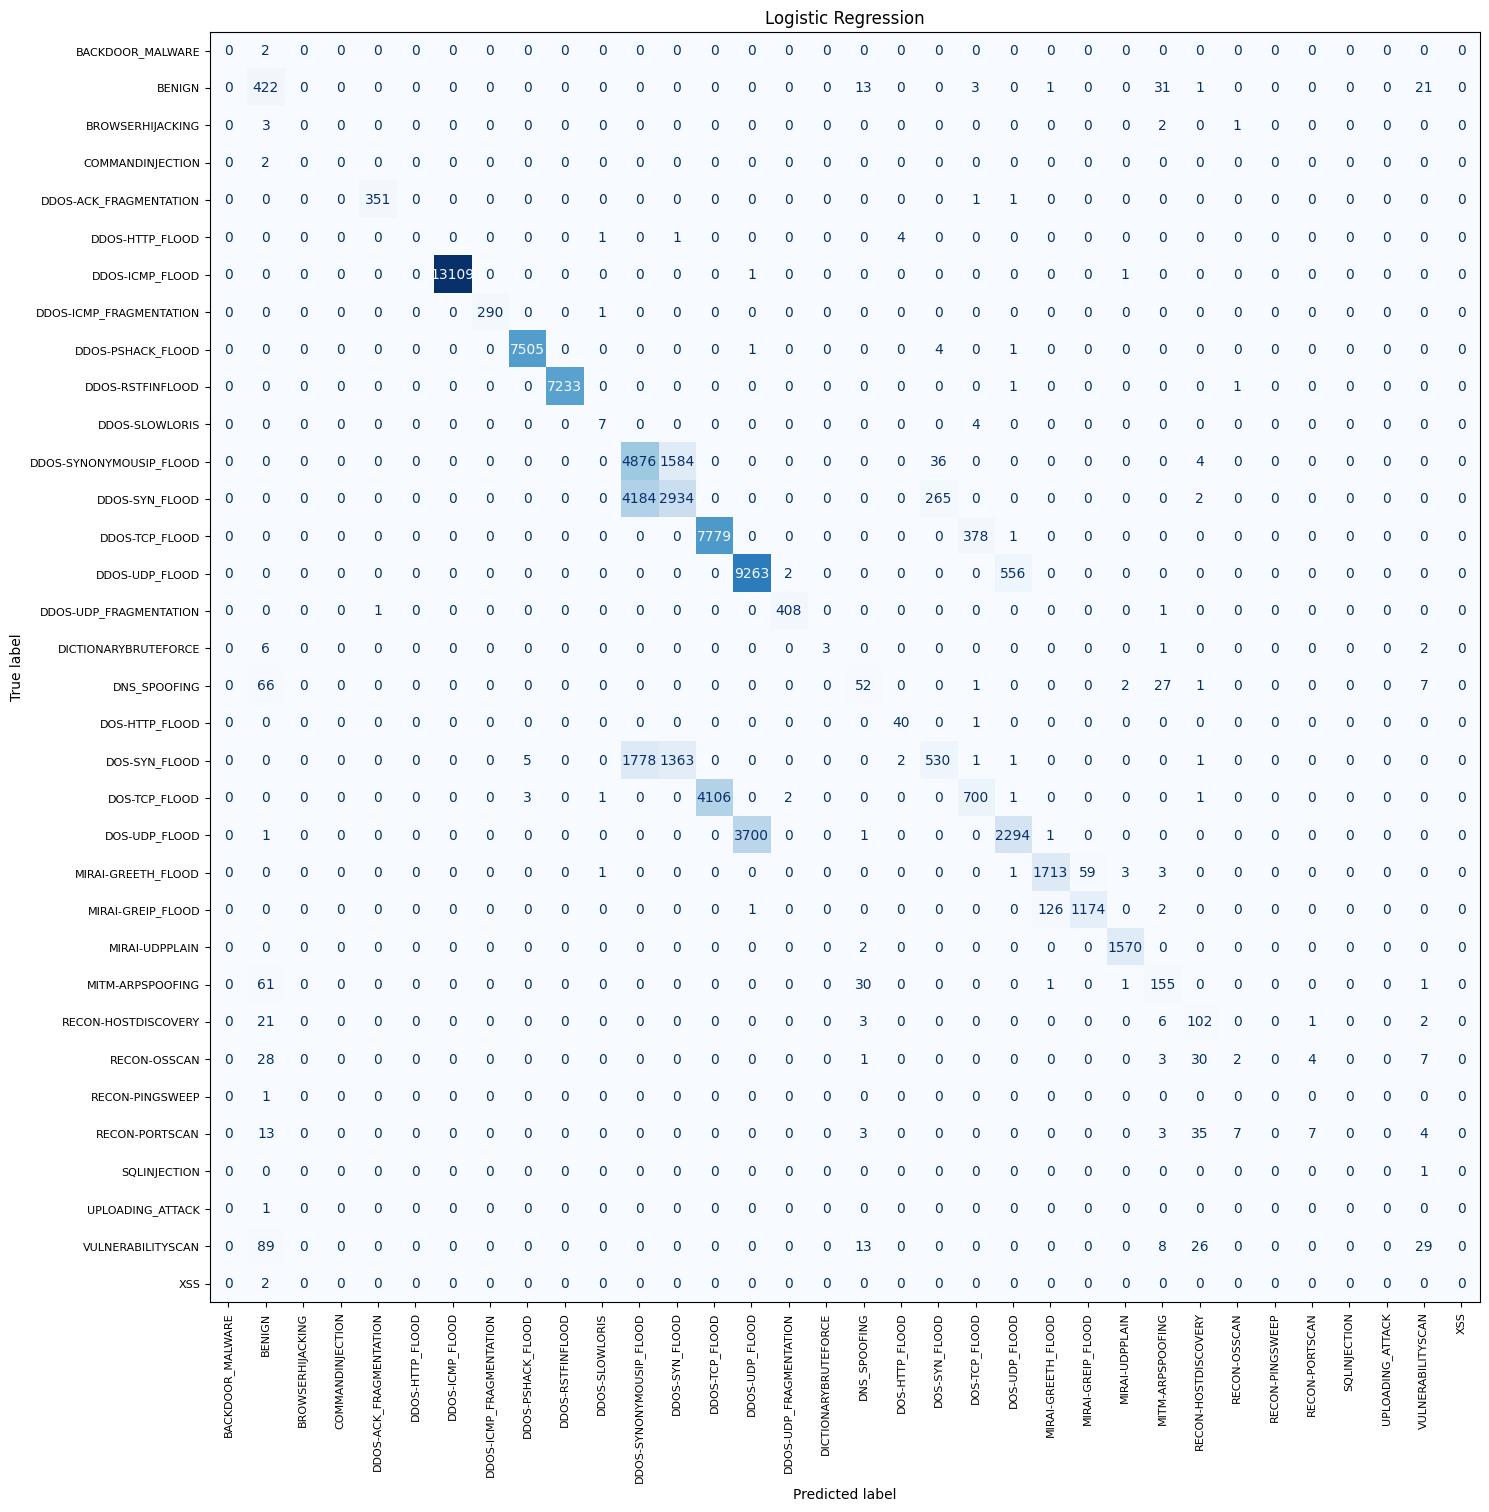

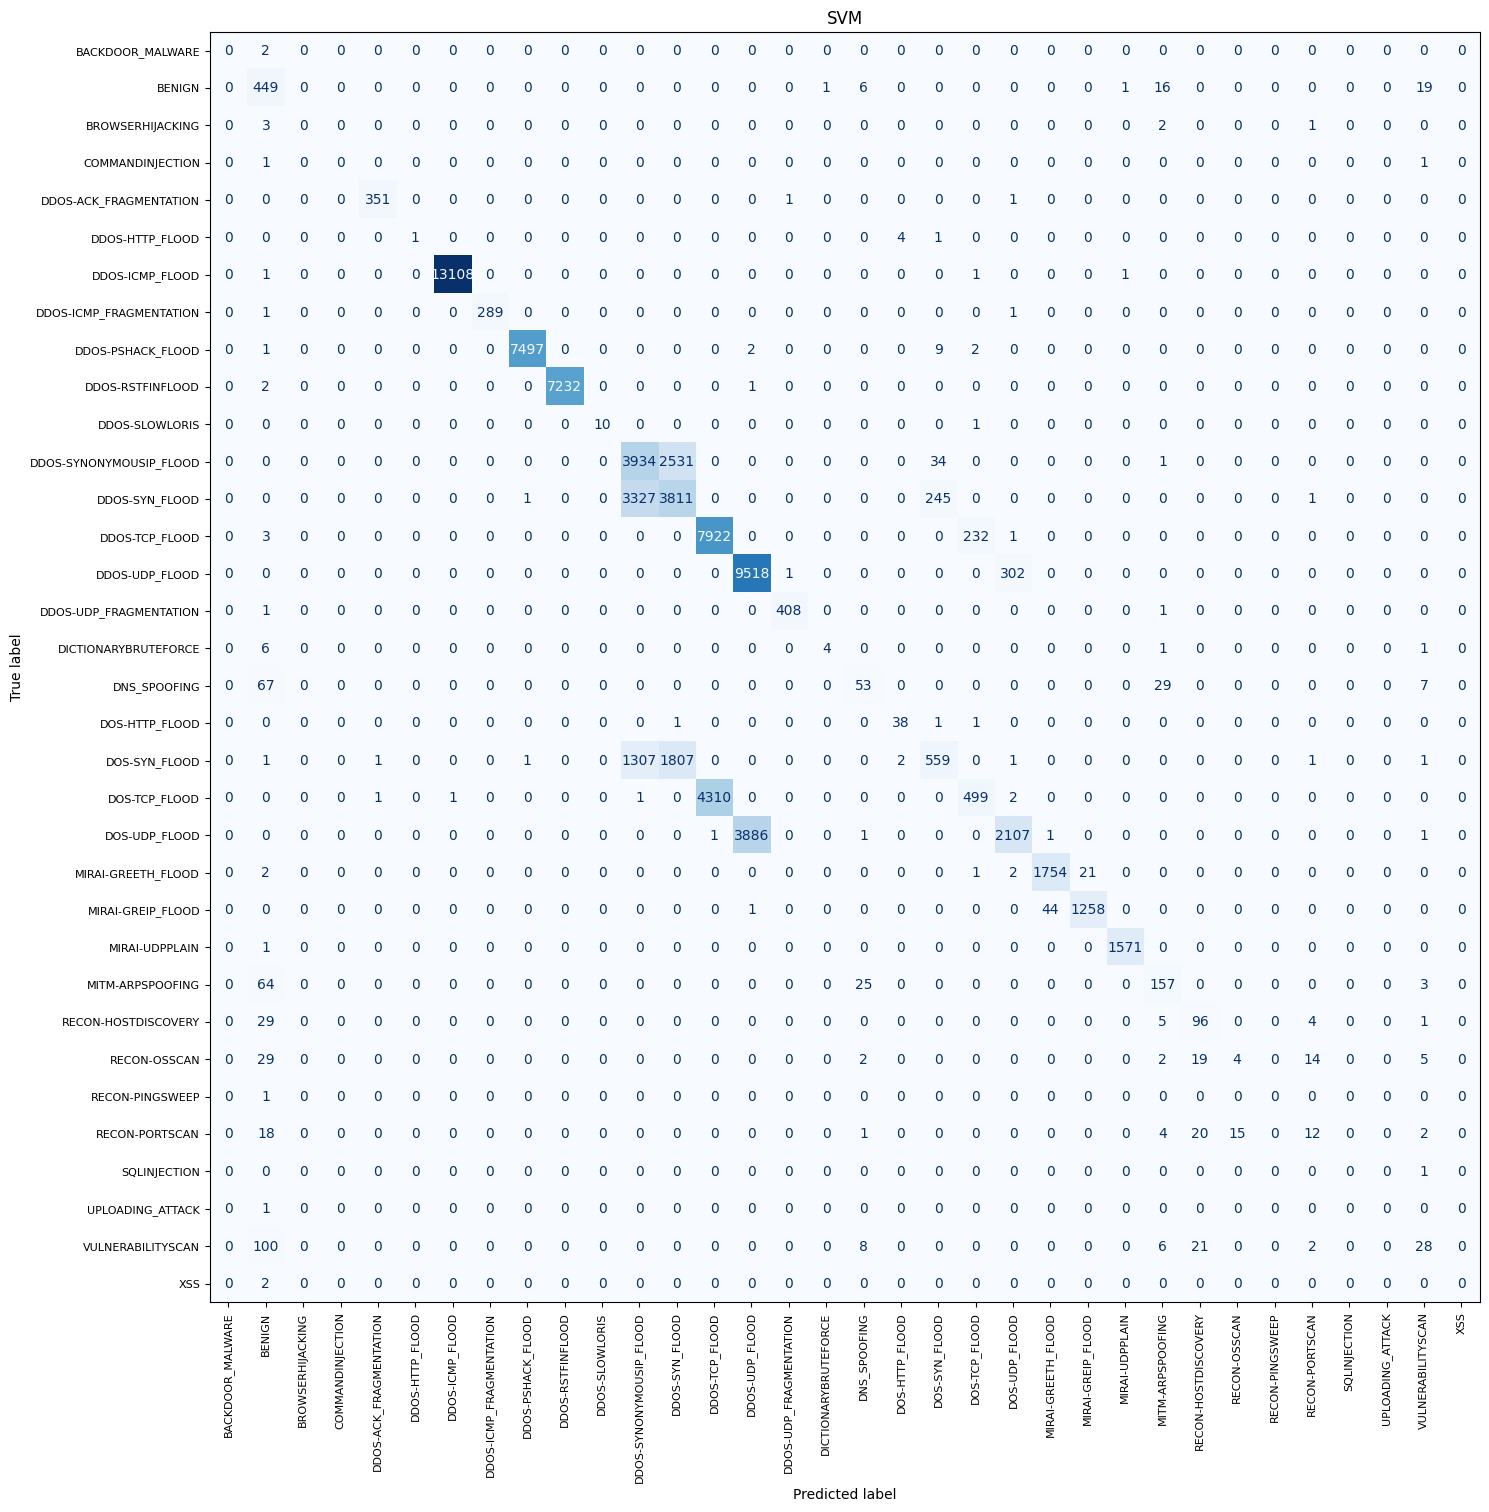

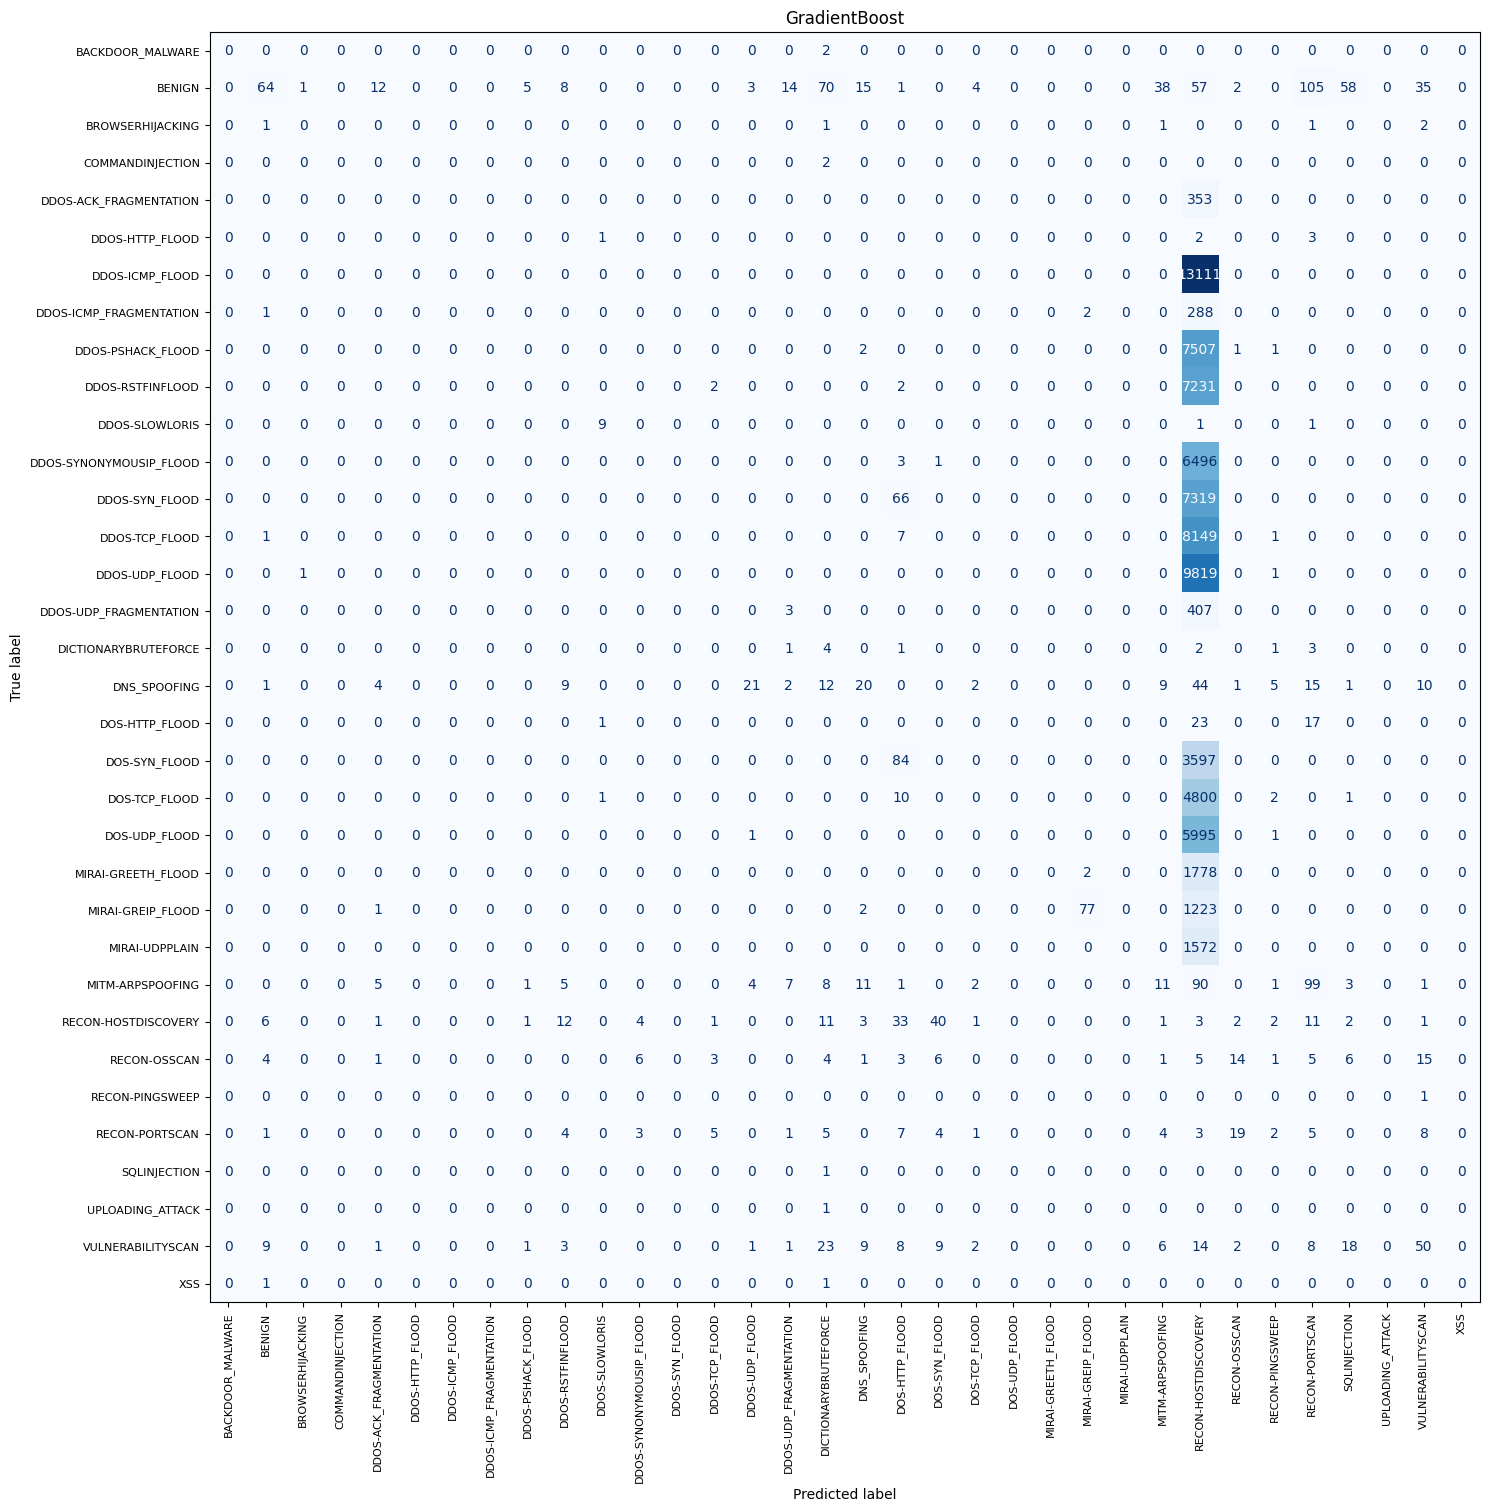

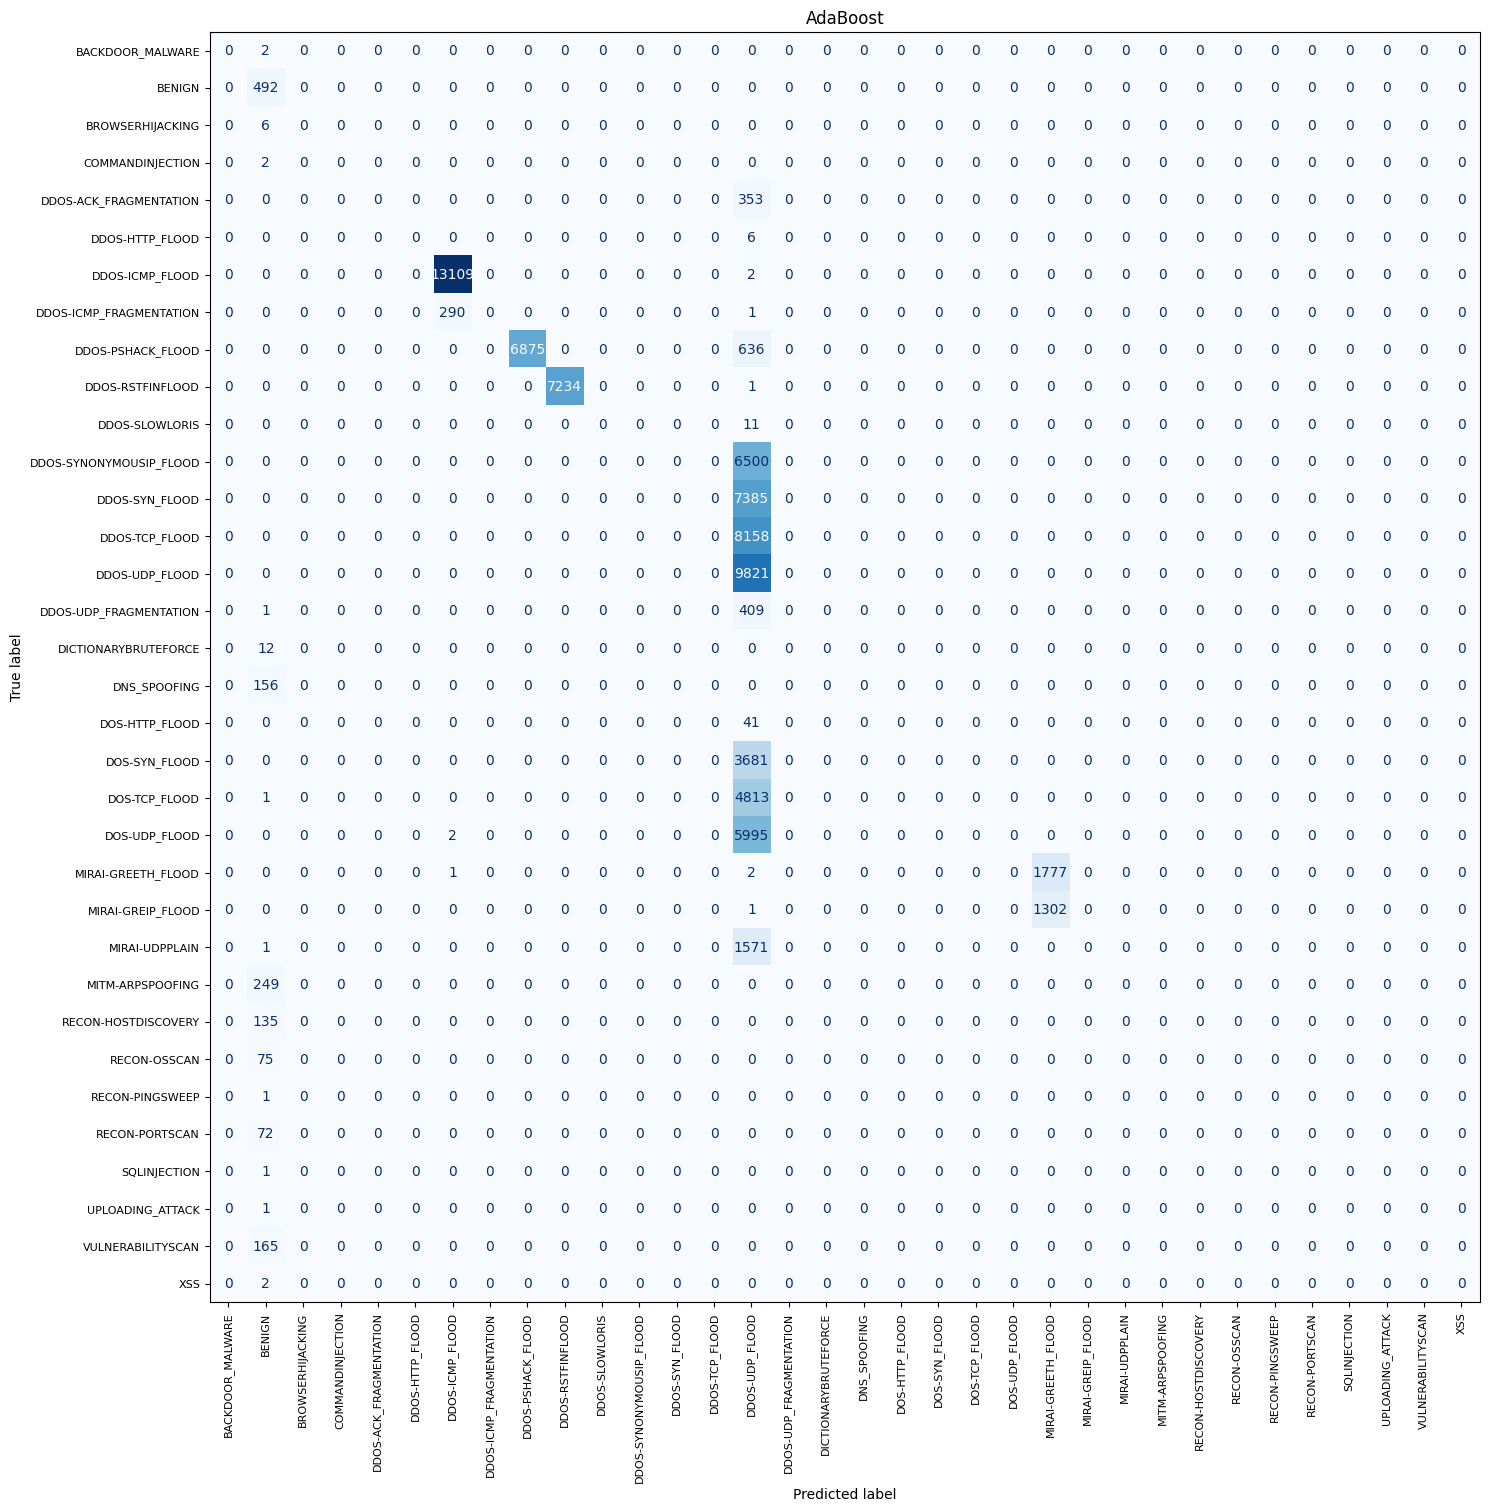

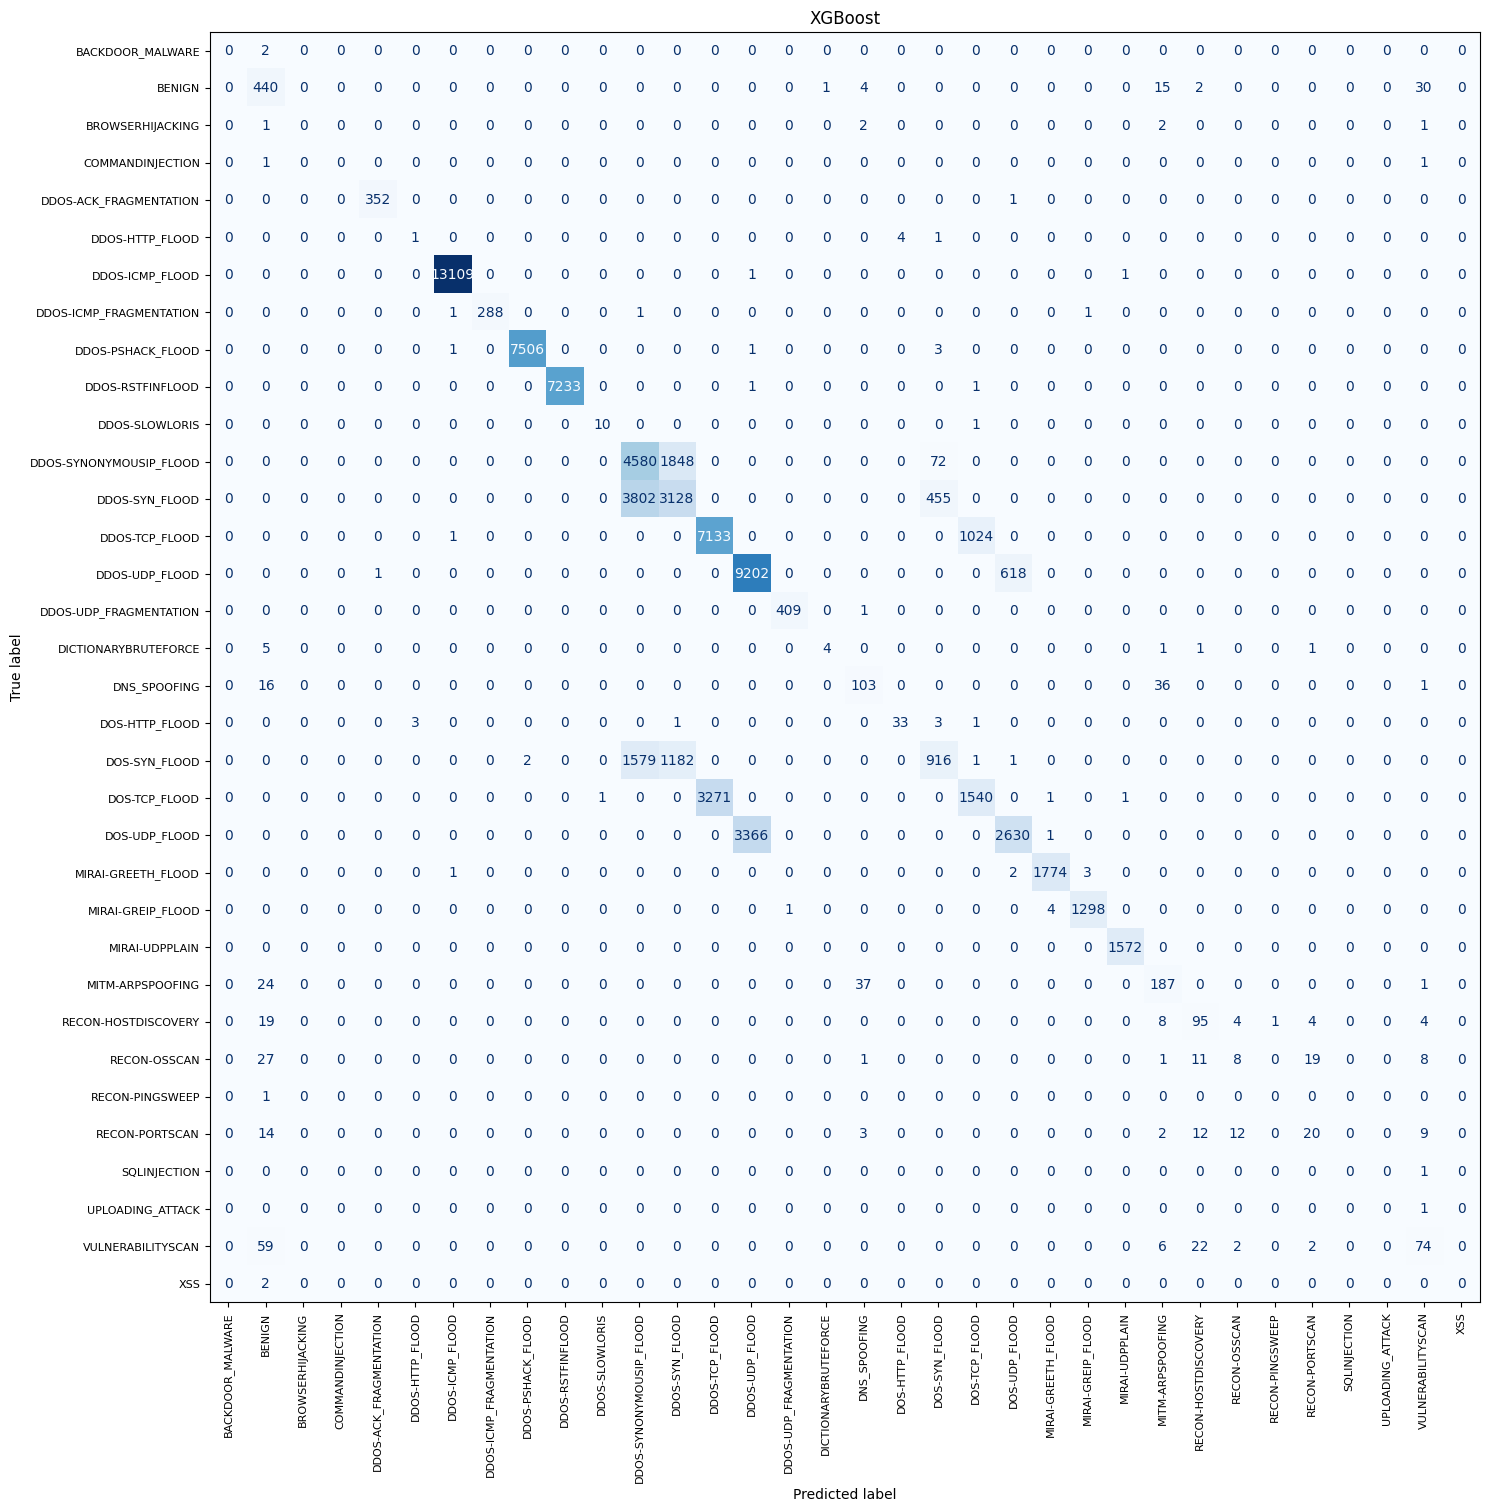

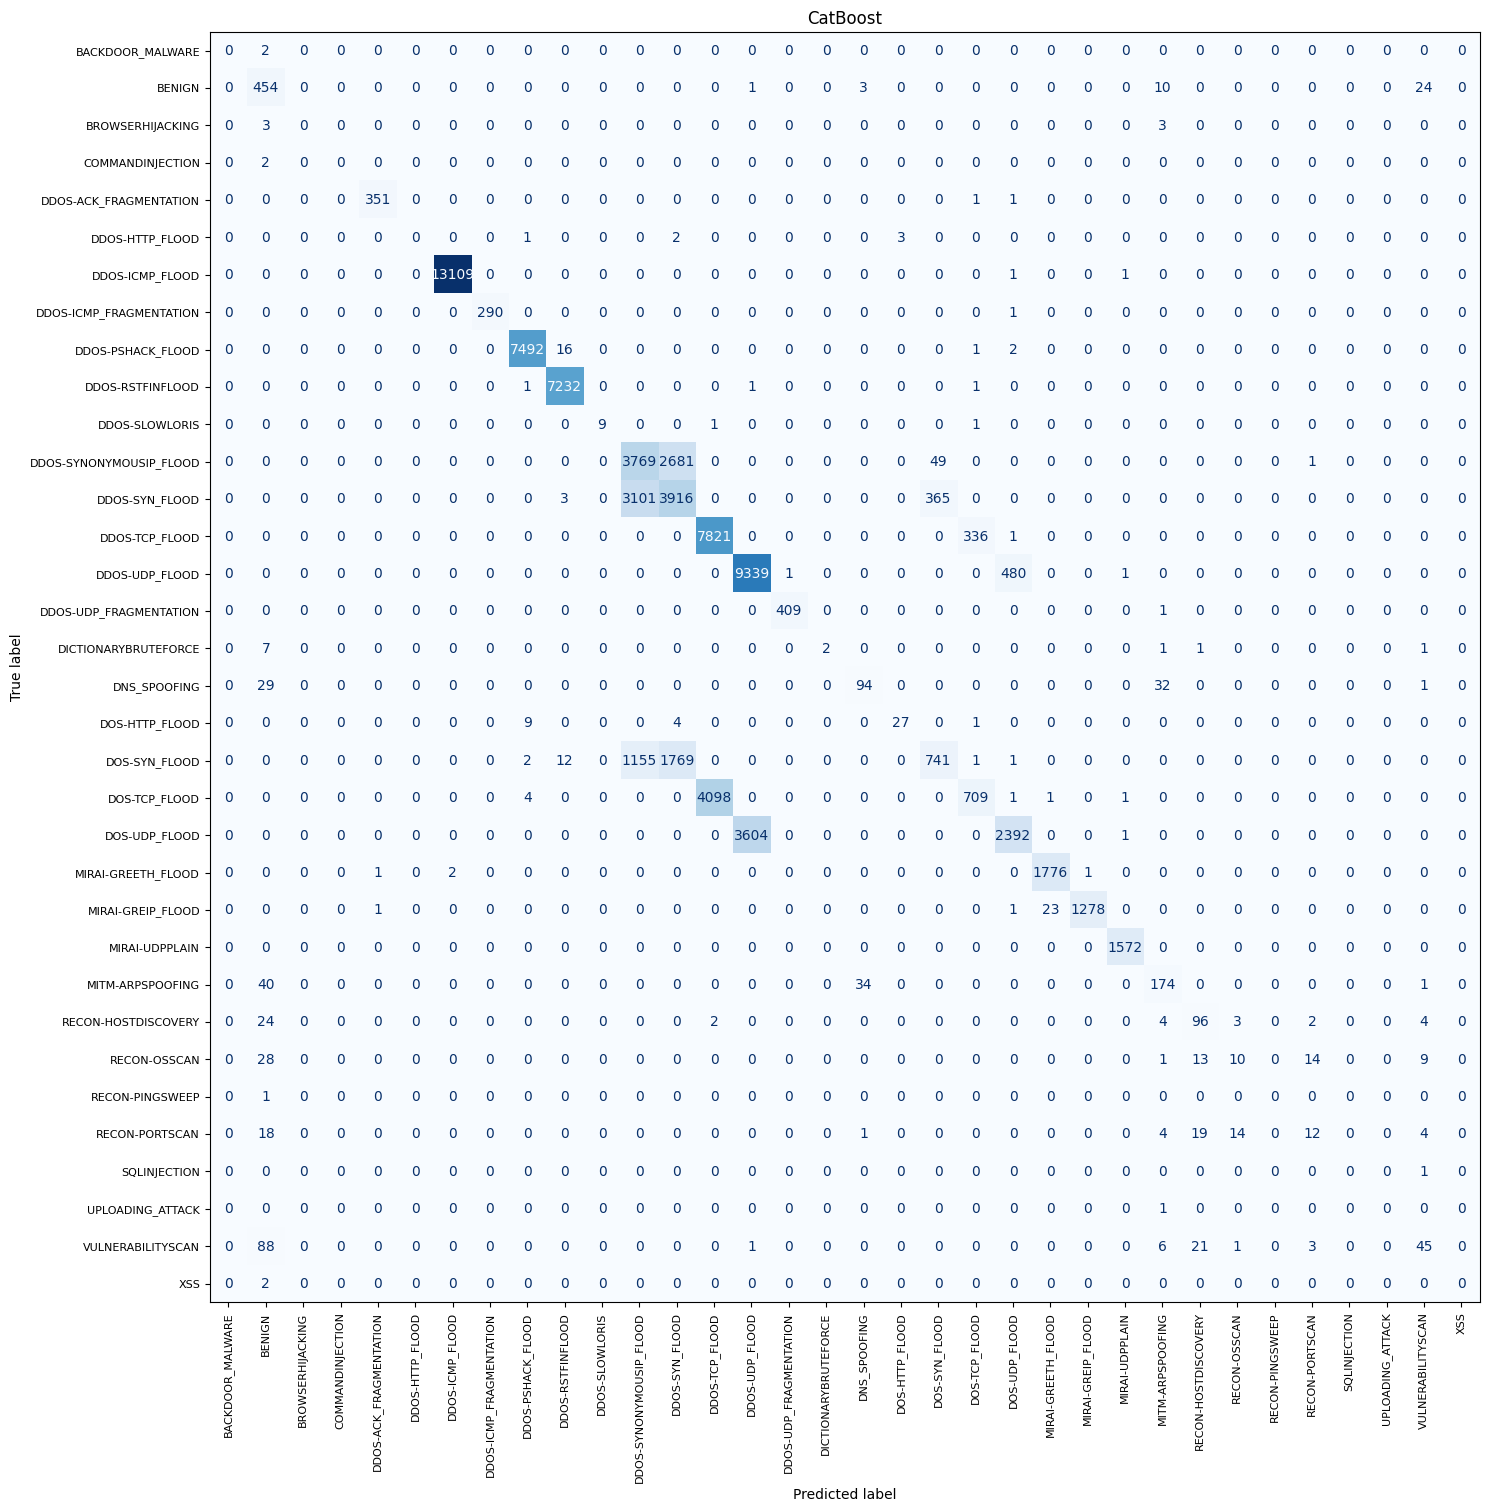

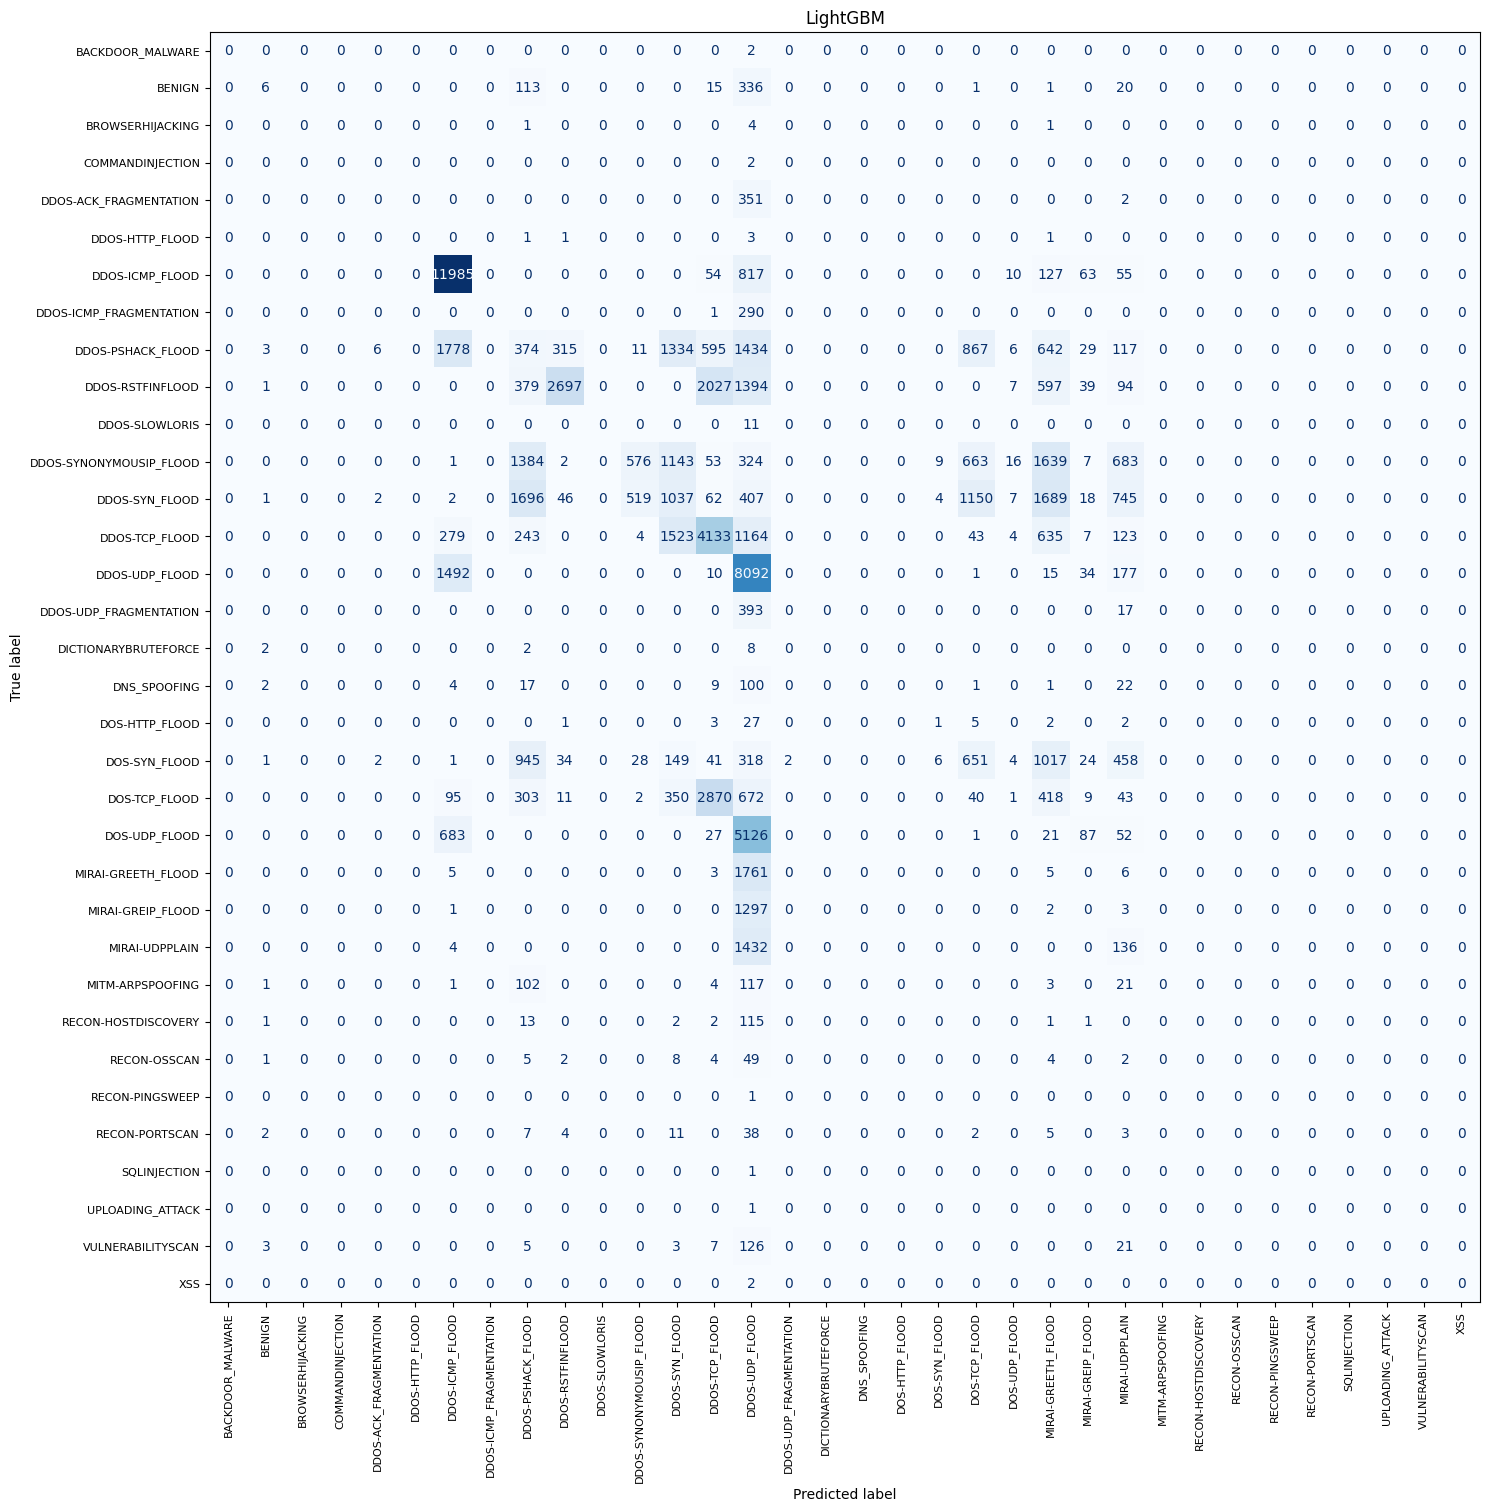

In [30]:
models = {
    "KNN": knn_model_cla,
    "Decision Tree": dt_model_cla,
    "Random Forest": rf_model_cla,
    "Logistic Regression": lr_model_cla,
    "SVM": svm_model_cla,
    "GradientBoost": gb_model_cla,
    "AdaBoost": ada_model_cla,
    "XGBoost": xgb_model_cla,
    "CatBoost": catboost_model,
    "LightGBM": lgbm_model_cla
}


model_names = list(models.keys())
num_models = len(model_names)

output_dir = "confusion_matrices"
os.makedirs(output_dir, exist_ok=True)

encoded_labels = list(range(len(encoders['Label'].classes_)))

figsize = (15, 20)  

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=encoded_labels)

    fig, ax = plt.subplots(figsize=figsize)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoders['Label'].classes_)
    disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False, xticks_rotation=90)

    ax.set_title(f"{model_name}")
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{model_name}_confusion_matrix.png"), dpi=300)
    plt.show()  
    plt.close(fig)  